http://scipy-lectures.org/packages/statistics/index.html

In [1]:
!wget http://scipy-lectures.org/_downloads/brain_size.csv

--2019-10-23 08:14:42--  http://scipy-lectures.org/_downloads/brain_size.csv
Resolving scipy-lectures.org (scipy-lectures.org)... 185.199.111.153, 185.199.110.153, 185.199.109.153, ...
Menghubungi scipy-lectures.org (scipy-lectures.org)|185.199.111.153|:80... tersambung.
Permintaan HTTP dikirimkan, menunggu jawaban... 200 OK
Panjang: 1801 (1,8K) [text/csv]
Simpan ke: `brain_size.csv'

brain_size.csv      100%[===================>]   1,76K  --.-KB/s    in 0s      

2019-10-23 08:14:42 (77,9 MB/s) - `brain_size.csv' disimpan [1801/1801]



In [1]:
import pandas
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [14]:
data[data['Gender'] == 'Male']['Weight'].mean()

166.44444444444446

In [16]:
data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [18]:
%percentile
data.Weight.quantile(0.95)

187.6

In [2]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [7]:
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})  

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


In [8]:
data.shape    # 40 rows and 8 columns

(40, 8)

In [9]:
data.columns  # It has columns   

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [10]:
print(data['Gender'])  # Columns can be addressed by name   

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [11]:
# Simpler selector
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

In [12]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [13]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [3]:
from pandas import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e95a4f7f0>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbcf277240>,
      dtype=object)

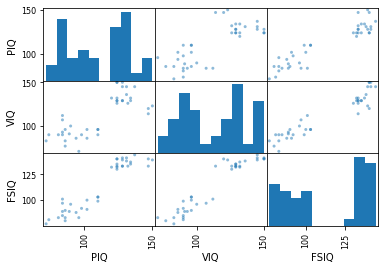

In [25]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

---

In [5]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})

In [6]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [7]:
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           8.56e-08
Time:                        16:59:24   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

In [8]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")

In [9]:
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Fri, 25 Oct 2019   Prob (F-statistic):              0.445
Time:                        17:00:36   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [10]:
model = ols('VIQ ~ C(Gender)', data).fit()

In [11]:
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long)  

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
5    99  fsiq
6   138  fsiq
7    92  fsiq
8    89  fsiq
9   133  fsiq
10  132  fsiq
11  141  fsiq
12  135  fsiq
13  140  fsiq
14   96  fsiq
15   83  fsiq
16  132  fsiq
17  100  fsiq
18  101  fsiq
19   80  fsiq
20   83  fsiq
21   97  fsiq
22  135  fsiq
23  139  fsiq
24   91  fsiq
25  141  fsiq
26   85  fsiq
27  103  fsiq
28   77  fsiq
29  130  fsiq
..  ...   ...
10  124   piq
11  128   piq
12  124   piq
13  147   piq
14   90   piq
15   96   piq
16  120   piq
17  102   piq
18   84   piq
19   86   piq
20   86   piq
21   84   piq
22  134   piq
23  128   piq
24  102   piq
25  131   piq
26   84   piq
27  110   piq
28   72   piq
29  124   piq
30  132   piq
31  137   piq
32  110   piq
33   86   piq
34   81   piq
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [12]:
model = ols("iq ~ type", data_long).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Fri, 25 Oct 2019   Prob (F-statistic):              0.643
Time:                        17:01:20   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

In [13]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [15]:
data = pandas.read_csv('http://scipy-lectures.org/_downloads/iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           1.58e-20
Time:                        17:03:15   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

In [16]:
print(model.f_test([0, 1, -1, 0]))  

<F test: F=array([[3.24533535]]), p=0.07369058781700577, df_denom=146, df_num=1>


In [17]:
print(data)

     sepal_length  sepal_width  petal_length  petal_width       name
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    